In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("data/experiment_2_method_UM10_profile_100.csv")
df.head()

,perc_rows,number_rows,number_proposals,number_individuals,simulation,RANK(WR),RANK(COP),RANK(STD),RANK(DIV(WR)),RANK(DIV(COP)),...,"KT(RANK(DIV(WR)),RANK(DIV(COP)))","KT(RANK(DIV(COP)),STD)","KT(RANK(DIV(COP)),COP)","KT(RANK(DIV(COP)),RANK(DIV(WR)))",Rob(WR),Rob(COP),"Rob(DIV,WR)","Rob(DIV,COP)","Spearman(DIV,WR)","Spearman(DIV,COP)"
0,10.0,2,3,100,0,"[1, 2, 0]","[1, 2, 0]","[2, 1, 0]","[0, 1, 2]","[0, 1, 2]",...,1.000000,-1.000000,-0.333333,1.000000,1.0,1.0,-1.000000,1.0,-1.0,1.0
1,20.0,2,3,100,0,"[1, 2, 0]","[1, 2, 0]","[2, 1, 0]","[2, 0, 1]","[0, 1, 2]",...,-0.333333,-1.000000,-0.333333,-0.333333,1.0,1.0,0.333333,1.0,0.5,1.0
2,30.0,2,3,100,0,"[1, 2, 0]","[1, 2, 0]","[2, 1, 0]","[2, 0, 1]","[0, 1, 2]",...,-0.333333,-1.000000,-0.333333,-0.333333,1.0,1.0,0.333333,1.0,0.5,1.0
3,40.0,3,3,100,0,"[1, 2, 0]","[1, 2, 0]","[2, 1, 0]","[2, 1, 0]","[0, 1, 2]",...,-1.000000,-1.000000,-0.333333,-1.000000,1.0,1.0,1.000000,1.0,1.0,1.0
4,50.0,3,3,100,0,"[1, 2, 0]","[1, 2, 0]","[2, 1, 0]","[2, 1, 0]","[2, 0, 1]",...,0.333333,0.333333,-0.333333,0.333333,1.0,1.0,1.000000,1.0,1.0,1.0


In [3]:
# Changing the format to plot the image above
subp = df.melt(id_vars=['perc_rows','number_proposals',
                        'number_individuals','simulation'],\
                 value_vars=["Rob(DIV,WR)",
                             "Rob(DIV,COP)",
                            "KT(RANK(DIV(COP)),RANK(DIV(WR)))"])

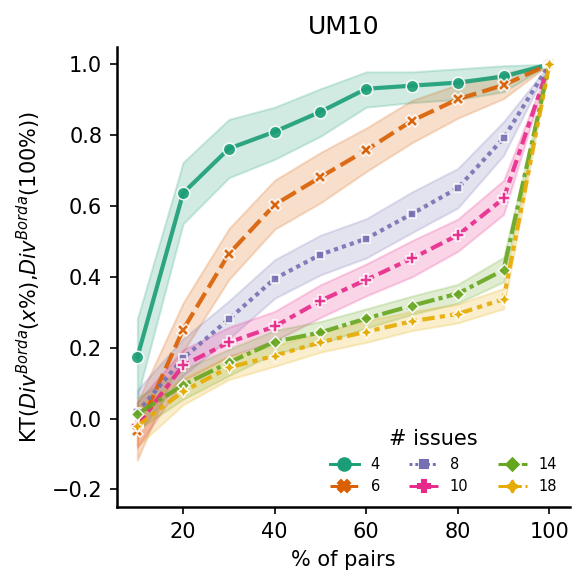

In [4]:
# Figure1
fig, ax = plt.subplots(figsize=(4,4), dpi=150)

subp['size'] = 1500
g = sns.lineplot(data=subp[(subp['number_individuals'].isin([100])) & 
                           (subp['variable'].isin(["Rob(DIV,WR)"])) & 
                          (subp['number_proposals'].isin([4,6,8,10,14,18]))].dropna(), \
                    x='perc_rows', 
                    y='value',\
                    hue='number_proposals',
                    linewidth=2, 
                    style='number_proposals',\
                    markers = True, 
                    alpha=0.9, 
                    palette='Dark2', 
                    legend=True,
                    ax=ax)
leg = g.legend(title="# issues", frameon=False, fontsize=7, ncol=3, loc='lower right')
leg.get_title().set_position((-10, 0))
for line in leg.get_lines():
    line.set_linewidth(1.4)


ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-0.25,1.05)
plt.title("UM10")
ax.set_ylabel("KT($\mathit{Div}^\mathit{Borda}(x\%)$,$\mathit{Div}^\mathit{Borda}(100\%)$)")
ax.set_xlabel("% of pairs")
plt.tight_layout()
plt.savefig("figures/figure_2.pdf")